# Convolutional Neural Network

### Importing the libraries

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
tf.__version__

'2.16.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [10]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

c:\Users\munee\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [52]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [53]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [54]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [55]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [56]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [57]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


c:\Users\munee\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 207ms/step - accuracy: 0.5551 - loss: 0.7183 - val_accuracy: 0.6410 - val_loss: 0.6326
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.6528 - loss: 0.6339 - val_accuracy: 0.6325 - val_loss: 0.6483
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 192ms/step - accuracy: 0.6956 - loss: 0.5748 - val_accuracy: 0.7385 - val_loss: 0.5512
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.7305 - loss: 0.5336 - val_accuracy: 0.7580 - val_loss: 0.4990
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.7556 - loss: 0.4955 - val_accuracy: 0.7595 - val_loss: 0.4987
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 191ms/step - accuracy: 0.7659 - loss: 0.4842 - val_accuracy: 0.7840 - val_loss: 0.4617
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 191ms/step - accuracy: 0.7861 - loss: 0.4527 - val_accuracy: 0.7645 - val_loss: 0.5201
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 194ms/step - accuracy: 0.7935 - loss: 0.4341 - val

In [58]:
# Summary of the model
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,090,405 (42.31 MB)

 Trainable params: 3,696,801 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,393,604 (28.20 MB)

## Part 4 - Making a single prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


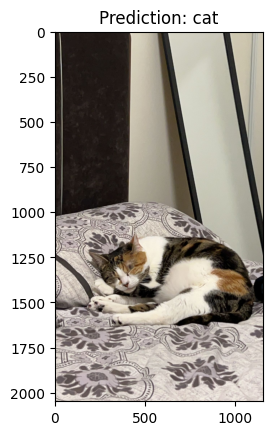

In [122]:
import numpy as np
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

# Prediction of a single image
path = 'dataset/single_prediction/cat_or_dog_6.jpg'
test_image = image.load_img(path, target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

# Printiing the output prediction with bounding box
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Prediction: {prediction}")
plt.show()

In [88]:
# Saving the model
cnn.save('my_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


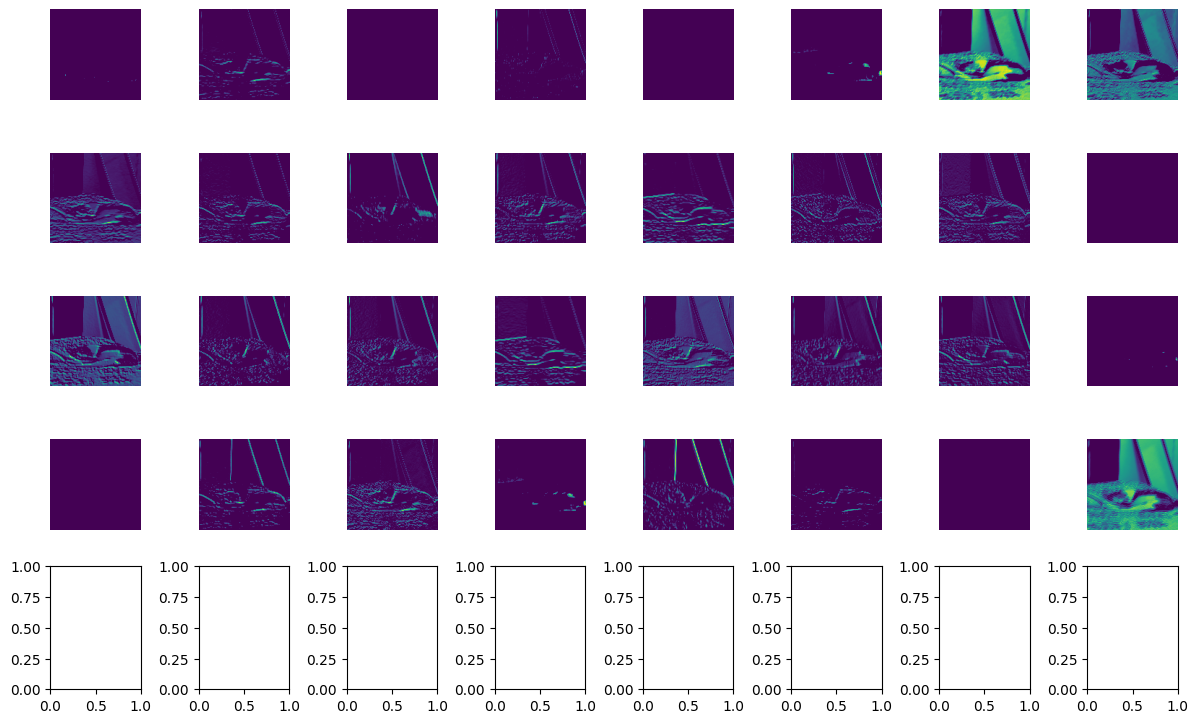

In [14]:
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

def get_activations(model, image, layer_name):
    model = Model(inputs=model.inputs, outputs=model.get_layer(layer_name).output)
    return model.predict(image)

def plot_feature_maps(activations, num_cols=8):
    num_features = activations.shape[-1]
    num_rows = num_features // num_cols + 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*1.5, num_rows*1.5))
    for i in range(num_features):
        ax = axes[i//num_cols, i%num_cols]
        ax.imshow(activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
activations = get_activations(cnn, test_image/255.0, 'conv2d_2')  # Change 'conv2d' to your layer's name
plot_feature_maps(activations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


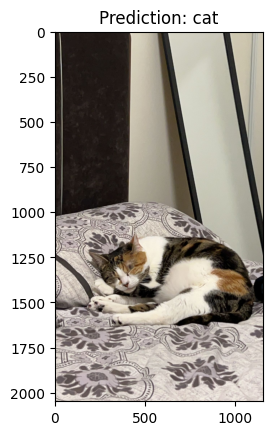

In [13]:
# load the model
import tensorflow as tf
cnn = tf.keras.models.load_model('my_model.keras')

# use the model to make predictions
import numpy as np
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

# Prediction of a single image
path = 'dataset/single_prediction/cat_or_dog_6.jpg'
test_image = image.load_img(path, target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
    prediction = 'cat'
    
# Printiing the output prediction with bounding box
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Prediction: {prediction}")
plt.show()